In [89]:
#all package used for this test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [104]:
#import data
features = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv', index_col=0)
features = features.drop('peak_int', 1)
features.head(5)

,ACCESSION,class1,class2,class3,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
7,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.063692,0.122807,0.002695
8,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.037912,0.122807,0.008985
9,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.034229,0.122807,0.089847
10,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.030329,0.122807,0.053908
11,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.028596,0.122807,0.013477


In [105]:
#display all informations of the data frame
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44524 entries, 7 to 49307
Data columns (total 9 columns):
ACCESSION           44524 non-null object
class1              44524 non-null object
class2              44524 non-null object
class3              44524 non-null object
AC_mode             44524 non-null int64
ion_precursor_mz    44524 non-null float64
peak_mz             44524 non-null float64
num_peak            44524 non-null float64
peak_rel_int        44524 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.4+ MB


In [106]:
#Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
features.describe()

,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
count,44524.000000,44524.000000,44524.000000,44524.000000,44524.000000
mean,0.640890,0.199108,0.056068,0.137794,0.226142
std,0.479745,0.132022,0.043979,0.116932,0.287190
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.087571,0.022968,0.052632,0.045822
50%,1.000000,0.193968,0.042244,0.105263,0.089847
75%,1.000000,0.291334,0.073224,0.175439,0.256963
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
print("We have 761 different class for class 3 but still have a really good score with ramdom forest annalysis.", '\n'
     "An overfitting is suspected probably due to class imbalance,checked below.")

We have 761 different class for class 3 but still have a really good score with ramdom forest annalysis. 
An overfitting is suspected probably due to class imbalance,checked below.


In [108]:
#Check Class Imbalance
#Class imbalance is a term used to describe when a target class within a data set is outnumbered 
#by another target class (or classes). This can create misleading accuracy metrics, known as an accuracy paradox. 
#To make sure our target classes aren't imbalanced, create a function that will output the distribution of the target 
#classes.
#Note: If your data set suffers from class imbalance, I suggest reading up on upsampling and downsampling.

def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 1000 print warning
        if len(col_vals['index']) > 1000:
            print('Warning: values in column are more than 1000 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.5f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [109]:
print_dx_perc(features, 'class3')

Kaempferol glycoside accounts for 7.51056% of the class3 column
Quercetin glycoside accounts for 5.70703% of the class3 column
Vitamin accounts for 3.99335% of the class3 column
Aliphatic glucosinolate accounts for 2.22352% of the class3 column
Apigenin glycoside accounts for 1.87315% of the class3 column
Luteolin glycoside accounts for 1.82149% of the class3 column
Cyanidin glycoside accounts for 1.54748% of the class3 column
Isorhamnetin glycoside accounts for 1.48684% of the class3 column
Quinic acid accounts for 1.38802% of the class3 column
Sphingosine accounts for 1.31614% of the class3 column
CoA accounts for 1.28245% of the class3 column
Uridine phosphate accounts for 1.26224% of the class3 column
Proanthocyanidin accounts for 1.23978% of the class3 column
Guanosine phosphate accounts for 1.17016% of the class3 column
Isothiocyanate accounts for 1.03315% of the class3 column
Serine accounts for 0.94780% of the class3 column
Adenosine phosphate accounts for 0.89839% of the class

In [110]:
print(features.groupby('class3').size().sort_values(ascending=False))

class3
Kaempferol glycoside       3344
Quercetin glycoside        2541
Vitamin                    1778
Aliphatic glucosinolate     990
Apigenin glycoside          834
Luteolin glycoside          811
Cyanidin glycoside          689
Isorhamnetin glycoside      662
Quinic acid                 618
Sphingosine                 586
CoA                         571
Uridine phosphate           562
Proanthocyanidin            552
Guanosine phosphate         521
Isothiocyanate              460
Serine                      422
Adenosine phosphate         400
Myricetin glycoside         393
Monosaccharide              382
Cytidine phosphate          354
Ginsenoside                 352
Oligopeptide                338
Oligosaccharide             324
Glycine                     296
Indole                      292
Tyrosine                    281
Peonidin glycoside          276
Hesperetin glycoside        267
Adenosine                   266
Disaccharide                261
                           ... 
Q

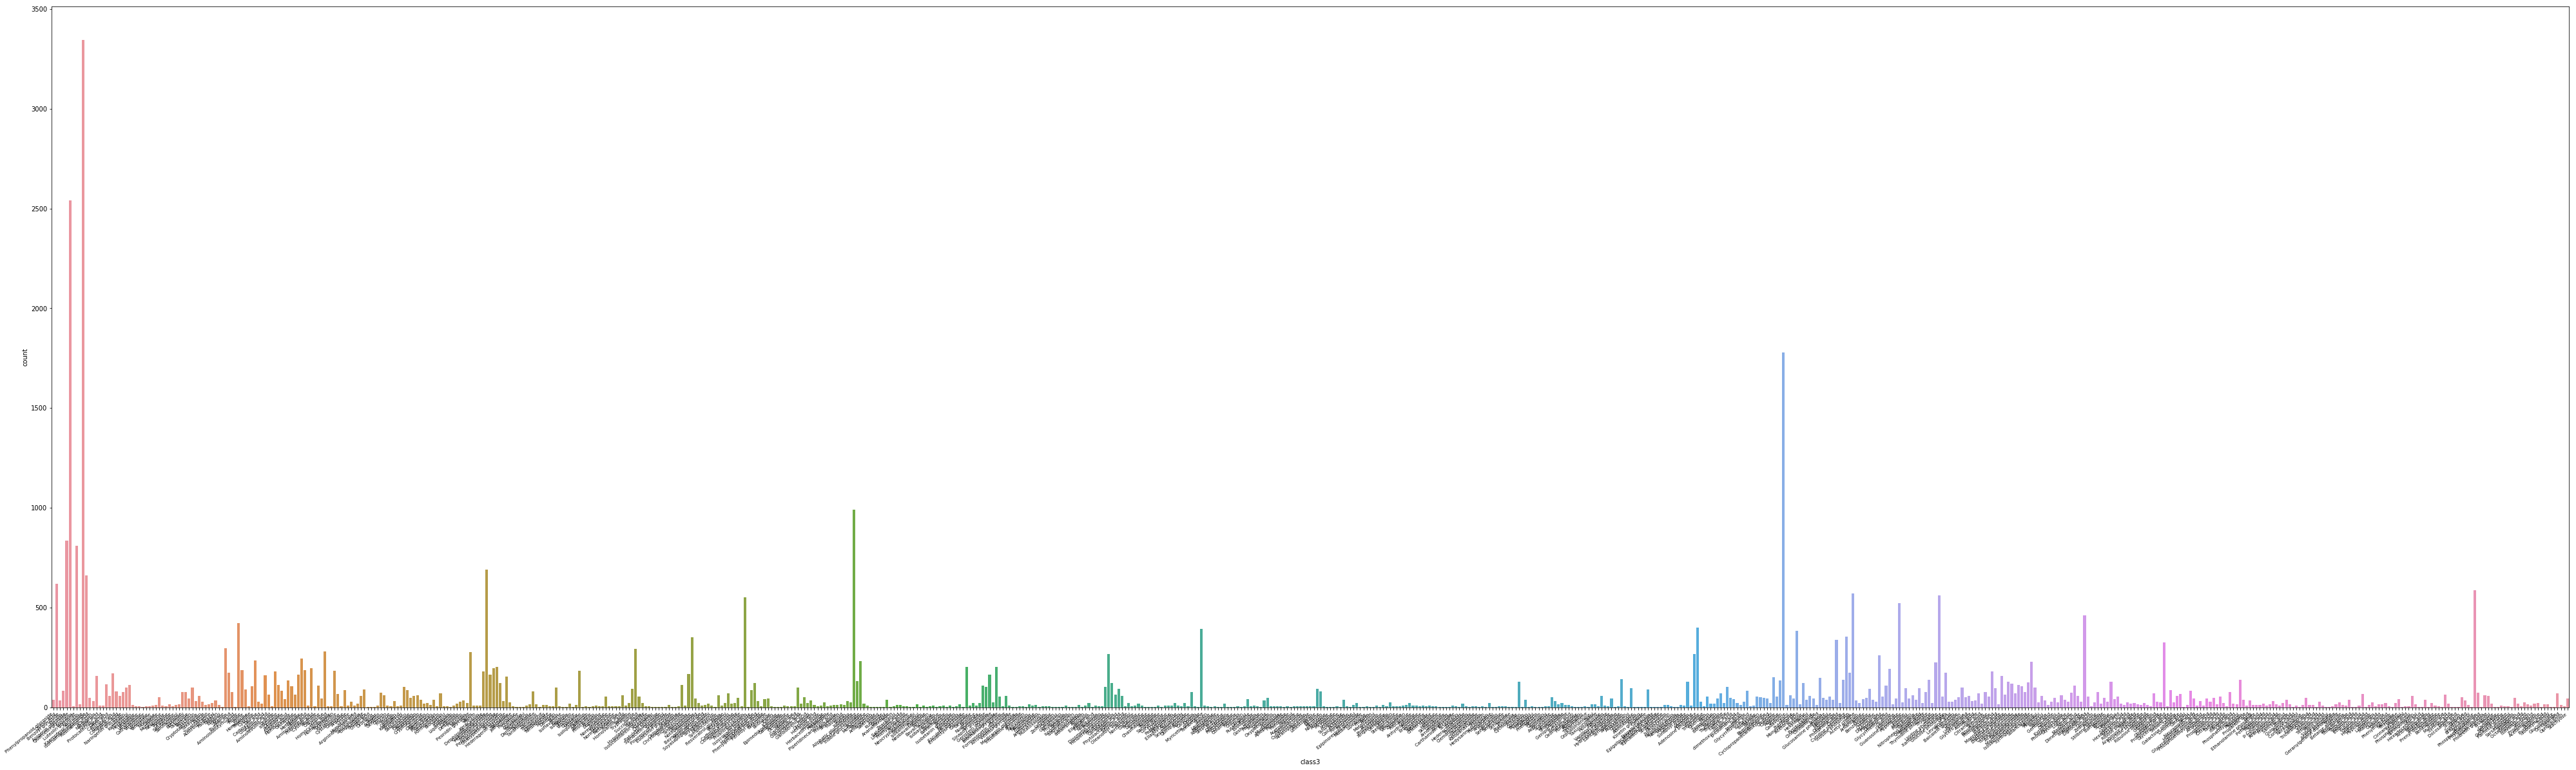

In [111]:
fig, ax = plt.subplots(figsize=(70,20))
ax = sns.countplot(x="class3", data=features)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7);

In [112]:
print('this data set clearly suffer from class imbalance')

this data set clearly suffer from class imbalance


In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features.class3 = labelencoder.fit_transform(features.class3)

In [152]:
drop = ['class1', 'class2', 'class3', 'ACCESSION', 'AC_mode']
X = features.drop(drop, axis =1)
y = features.class3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [158]:
from sklearn.neighbors import KNeighborsClassifier

score_minko = []
score_man = []
score_cheb =[]

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))

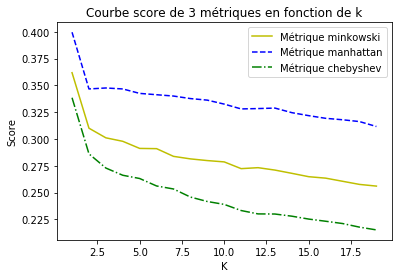

In [160]:
## Insérez votre code ici
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(1, 20),score_minko, 'y-', label='Métrique minkowski')
plt.plot(range(1, 20),score_man, 'b--', label='Métrique manhattan')
plt.plot(range(1, 20),score_cheb, 'g-.', label='Métrique chebyshev')
plt.title('Courbe score de 3 métriques en fonction de k')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend(loc="best");

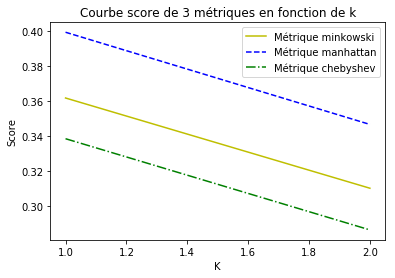

In [165]:
score_minko = []
score_man = []
score_cheb =[]

for k in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))
    
plt.plot(range(1, 3),score_minko, 'y-', label='Métrique minkowski')
plt.plot(range(1, 3),score_man, 'b--', label='Métrique manhattan')
plt.plot(range(1, 3),score_cheb, 'g-.', label='Métrique chebyshev')
plt.title('Courbe score de 3 métriques en fonction de k')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend(loc="best");

In [163]:
print('seems KNN is not the best classifier for this data')

KNN is not the best classifier for this data


In [219]:
print('Test of dimension reduction')

Test of dimension reduction


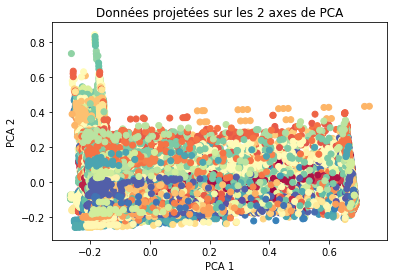

La part de variance expliquée est 1.0


In [195]:
pca = PCA(n_components = 2)
glop = pca.fit_transform(X)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(glop[:, 0], glop[:, 1], c = y, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

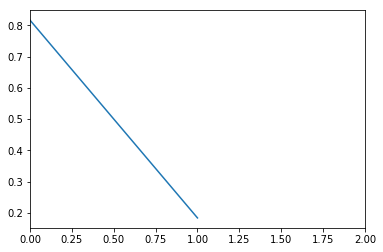

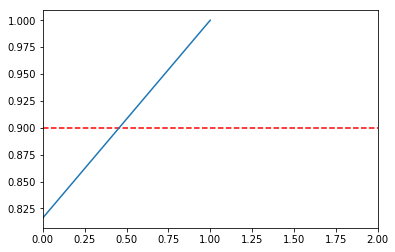

In [196]:
pca = PCA()
glop2 = pca.fit_transform(X)
plt.figure()
plt.xlim(0,2)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,2)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [197]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [200]:
knn = KNeighborsClassifier(metric= 'manhattan')
knn.fit(X_train, y_train)
print('score représentant le taux de bonnes prédictions (accuracy) :',knn.score(X_test, y_test))

score représentant le taux de bonnes prédictions (accuracy) : 0.342504211117


In [201]:
knn = KNeighborsClassifier(metric= 'manhattan')
knn.fit(X_train_pca, y_train)
print('score représentant le taux de bonnes prédictions (accuracy) après PCA :',knn.score(X_test_pca, y_test))

score représentant le taux de bonnes prédictions (accuracy) après PCA : 0.289163391353


In [217]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape

D:\anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


(35619, 4)

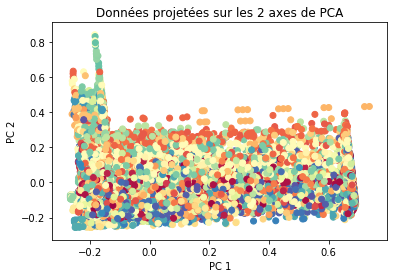

La part de variance expliquée est 1.0


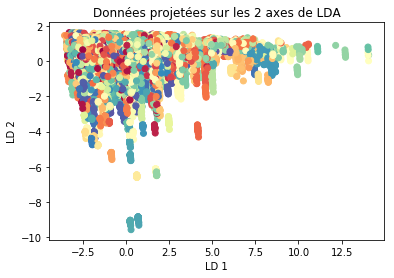

In [218]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')

ax.set_title("Données projetées sur les 2 axes de LDA")
plt.show();

In [226]:
print('A widely adopted technique for dealing with highly unbalanced datasets is called resampling.', '\n' 
      'It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).')

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).


In [223]:
print('Test of oversampling then pca on knn classifier')

Test of oversampling then pca on knn classifier


In [190]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

2500260 new random picked points


In [204]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros, test_size=0.2)

In [205]:
pca = PCA(n_components = 0.9)
X_train_pca_ros = pca.fit_transform(X_train_ros)
X_test_pca_ros = pca.transform(X_test_ros)

In [224]:
knn = KNeighborsClassifier(metric= 'manhattan')
knn.fit(X_train_pca_ros, y_train_ros)
print('accuracy après oversampling puis PCA :',knn.score(X_test_pca_ros, y_test_ros))

accuracy après oversampling puis PCA : 0.00145198906784


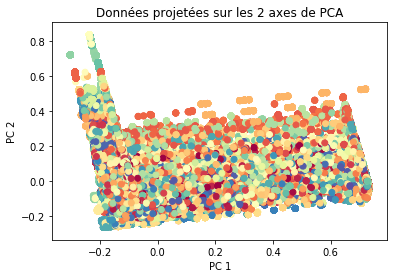

La part de variance expliquée est 1.0


In [208]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca_ros[:, 0], X_train_pca_ros[:, 1],  c = y_train_ros, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

In [225]:
print('Test of pca then oversampling  on knn classifier')

Test of pca then oversampling  on knn classifier


score représentant le taux de bonnes prédictions (accuracy) : 0.972856253082


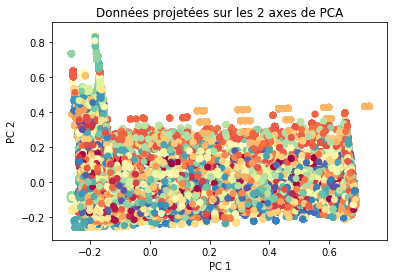

La part de variance expliquée est 1.0


In [215]:
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(X)

ros = RandomOverSampler()
X_pca_ros, y_pca_ros = ros.fit_sample(X_pca, y)

X_train_pca_ros, X_test_pca_ros, y_train_pca_ros, y_test_pca_ros = train_test_split(X_pca_ros, y_pca_ros, test_size=0.2)

knn = KNeighborsClassifier(metric= 'manhattan')
knn.fit(X_train_pca_ros, y_train_pca_ros)
print('score représentant le taux de bonnes prédictions (accuracy) :',knn.score(X_test_pca_ros, y_test_pca_ros))

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca_ros[:, 0], X_train_pca_ros[:, 1],  c = y_train_pca_ros, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))